<a href="https://colab.research.google.com/github/lauramazzu/hackbio-biocoding-internship/blob/main/hackbio_stage2_task2_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
!pip install bioinfokit
from bioinfokit import analys, visuz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59221 sha256=37d082562c989317944b15b70359ebdf669c73e31b259c4364a8dfdca9c5a341
  Stored in directory: /root/.cache/pip/wheels/83/cd/9c/8605a43f2310bfb74df791d943a9b3aef65377ed484de98bdc
Successfully built bioinfokit


Transcriptomics
#This is a processed RNAseq dataset involving reading in quantitated gene expression data from an RNA-seq experiment,
# exploring the data using base R functions and then interpretation.
# The dataset contains an experiment between a diseased cell line and diseased cell lines treated with compound X.
# The difference in expression change between the two health status is computed as Fold change to log 2 (Log2FC) and the significance of each is computed in p-value.
#Access Dataset Here
#Task:
#Generate a volcano plot. (Hint search for volcano plot online)
#Determine the upregulated genes (Genes with Log2FC > 1 and pvalue < 0.01)
#Determine the upregulated genes (Genes with Log2FC < -1 and pvalue < 0.01)
#What are the functions of the top 5 upregulated genes and top 5 downregulated genes. (Use genecards)


In [ ]:
#opening the dataset
file_url = "https://gist.githubusercontent.com/stephenturner/806e31fce55a8b7175af/raw/1a507c4c3f9f1baaa3a69187223ff3d3050628d4/results.txt"
df = pd.read_csv(file_url, delimiter = ' ') #adjust delimiter as per data format
print(df)

          Gene  log2FoldChange        pvalue      padj
0         DOK6        0.510000  1.861000e-08  0.000305
1         TBX5       -2.129000  5.655000e-08  0.000419
2      SLC32A1        0.900300  7.664000e-08  0.000419
3       IFITM1       -1.687000  3.735000e-06  0.006809
4        NUP93        0.365900  3.373000e-06  0.006809
...        ...             ...           ...       ...
16401     PKLR       -0.000191  9.996000e-01  0.999900
16402    OBFC1       -0.000046  9.998000e-01  0.999900
16403    FKBP8       -0.000055  9.997000e-01  0.999900
16404     LRMP       -0.000037  9.999000e-01  1.000000
16405     OXSM        0.000009  1.000000e+00  1.000000

[16406 rows x 4 columns]


In [ ]:
#looking at specific properties
df.shape

(16406, 4)

In [ ]:
df.columns

Index(['Gene', 'log2FoldChange', 'pvalue', 'padj'], dtype='object')

In [ ]:
df.head()

,Gene,log2FoldChange,pvalue,padj
0,DOK6,0.5100,1.861000e-08,0.000305
1,TBX5,-2.1290,5.655000e-08,0.000419
2,SLC32A1,0.9003,7.664000e-08,0.000419
3,IFITM1,-1.6870,3.735000e-06,0.006809
4,NUP93,0.3659,3.373000e-06,0.006809


In [ ]:
df.tail()

,Gene,log2FoldChange,pvalue,padj
16401,PKLR,-0.000191,0.9996,0.9999
16402,OBFC1,-0.000046,0.9998,0.9999
16403,FKBP8,-0.000055,0.9997,0.9999
16404,LRMP,-0.000037,0.9999,1.0000
16405,OXSM,0.000009,1.0000,1.0000


/usr/local/lib/python3.11/dist-packages/bioinfokit/visuz.py:153: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['color_add_axy'].fillna(color[1], inplace=True)  # intermediate


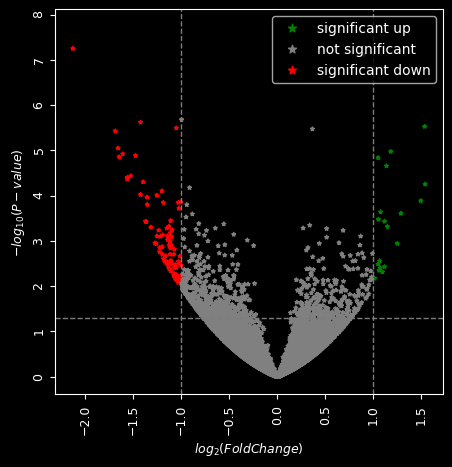

In [ ]:
#generate a Volcano plot
visuz.GeneExpression.volcano(df=df, lfc = 'log2FoldChange', pv = 'pvalue',  theme = 'dark', plotlegend=True, legendpos='upper right', markerdot= '*', sign_line= "True", show = True)


/usr/local/lib/python3.11/dist-packages/bioinfokit/visuz.py:153: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['color_add_axy'].fillna(color[1], inplace=True)  # intermediate


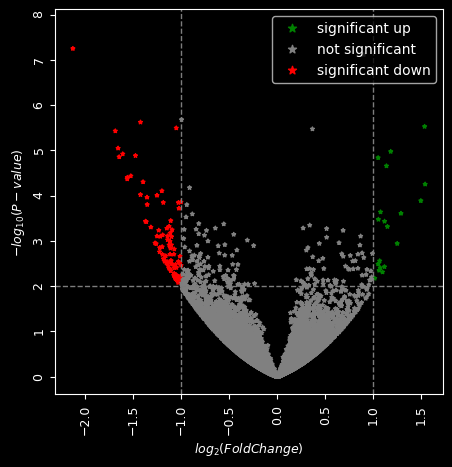

In [ ]:
#set the p value at 0.01 significance level with pv_thr=(0.01, 0.01)
visuz.GeneExpression.volcano(df=df, lfc = 'log2FoldChange', pv = 'pvalue',  theme = 'dark', lfc_thr = (1,1),  pv_thr=(0.01, 0.01),  plotlegend=True, legendpos='upper right', markerdot= '*', sign_line= "True", show = True)


In [ ]:
#Determine the upregulated genes (Genes with Log2FC > 1 and pvalue < 0.01)
#Determine the downregulated genes (Genes with Log2FC < -1 and pvalue < 0.01)

upregulated_genes_df = df[df.log2FoldChange > 1]
upregulated_genes_df.head()
upregulated_genes_df.shape
upregulated_genes_df

,Gene,log2FoldChange,pvalue,padj
5,EMILIN2,1.534,0.000003,0.006809
10,POU3F4,1.181,0.000011,0.015840
14,LOC285954,1.050,0.000015,0.015920
15,VEPH1,1.137,0.000022,0.022670
20,DTHD1,1.540,0.000056,0.043710
29,PI16,1.495,0.000130,0.077940
33,GALNTL2,1.075,0.000230,0.110900
34,C4orf45,1.288,0.000247,0.115900
37,PDE1B,1.053,0.000336,0.144900
38,BCAN,1.117,0.000370,0.147700


In [ ]:

upregulated_genes_df = df.query('log2FoldChange > 1 and pvalue <0.01')
upregulated_genes_df.head()
upregulated_genes_df.shape

(19, 4)

In [ ]:

upregulated_genes_df.head()

,Gene,log2FoldChange,pvalue,padj
5,EMILIN2,1.534,0.000003,0.006809
10,POU3F4,1.181,0.000011,0.015840
14,LOC285954,1.050,0.000015,0.015920
15,VEPH1,1.137,0.000022,0.022670
20,DTHD1,1.540,0.000056,0.043710


*Listed below are the functions of the top 5 upregulated genes from Genecards.*

**EMILIN2** = Predicted to enable extracellular matrix constituent conferring elasticity. Involved in several processes, including positive regulation of angiogenesis; positive regulation of defense response to bacterium; and positive regulation of platelet aggregation. Located in extracellular region. [provided by Alliance of Genome Resources, Nov 2024]

**POU3F4** = This gene encodes a member of the POU-III class of neural transcription factors. This family member plays a role in inner ear development. The protein is thought to be involved in the mediation of epigenetic signals which induce striatal neuron-precursor differentiation. Mutations in this gene are associated with X chromosome-linked nonsyndromic mixed deafness. [provided by RefSeq, Dec 2012]

**LOC285954** = INHBA-AS1 (INHBA Antisense RNA 1) is an RNA Gene, and is affiliated with the lncRNA class. Diseases associated with INHBA-AS1 include Glioma Susceptibility 1 and Gastric Cancer.

**VEPH1** = Predicted to enable phosphatidylinositol-5-phosphate binding activity. Involved in negative regulation of SMAD protein signal transduction and negative regulation of transforming growth factor beta receptor signaling pathway. Predicted to be active in plasma membrane. [provided by Alliance of Genome Resources, Nov 2024]

**DTHD1 **= This gene encodes a protein which contains a death domain. Death domain-containing proteins function in signaling pathways and formation of signaling complexes, as well as the apoptosis pathway. Alternative splicing results in multiple transcript variants. [provided by RefSeq, Oct 2012].  



In [ ]:
#downregulated genes
downregulated_genes_df = df.query('log2FoldChange < -1 and pvalue <0.01')
downregulated_genes_df

,Gene,log2FoldChange,pvalue,padj
1,TBX5,-2.129,5.655000e-08,0.000419
3,IFITM1,-1.687,3.735000e-06,0.006809
7,LAMA2,-1.425,2.390000e-06,0.006809
8,CAV2,-1.052,3.213000e-06,0.006809
9,TNN,-1.658,8.973000e-06,0.014720
...,...,...,...,...
230,SLFN11,-1.060,6.835000e-03,0.487200
233,CDCP1,-1.047,7.063000e-03,0.493100
237,A2M,-1.048,7.190000e-03,0.493500
242,SNAI1,-1.023,7.250000e-03,0.493500


In [ ]:
downregulated_genes_df.head()

,Gene,log2FoldChange,pvalue,padj
1,TBX5,-2.129,5.655000e-08,0.000419
3,IFITM1,-1.687,3.735000e-06,0.006809
7,LAMA2,-1.425,2.390000e-06,0.006809
8,CAV2,-1.052,3.213000e-06,0.006809
9,TNN,-1.658,8.973000e-06,0.014720


*Listed below are the functions of the top 5 downregulated genes from Genecards.*

**TBX5** = This gene is a member of a phylogenetically conserved family of genes that share a common DNA-binding domain, the T-box. T-box genes encode transcription factors involved in the regulation of developmental processes. This gene is closely linked to related family member T-box 3 (ulnar mammary syndrome) on human chromosome 12. The encoded protein may play a role in heart development and specification of limb identity. Mutations in this gene have been associated with Holt-Oram syndrome, a developmental disorder affecting the heart and upper limbs. Several transcript variants encoding different isoforms have been described for this gene. [provided by RefSeq, Jul 2008].

**IFITM1**= (Interferon Induced Transmembrane Protein 1) is a Protein Coding gene. Diseases associated with IFITM1 include Influenza and West Nile Virus. Among its related pathways are Cytokine Signaling in Immune system and Antiviral mechanism by IFN-stimulated genes. Gene Ontology (GO) annotations related to this gene include obsolete signal transducer activity, downstream of receptor. An important paralog of this gene is IFITM3.

**LAMA2**	= Laminin, an extracellular protein, is a major component of the basement membrane. It is thought to mediate the attachment, migration, and organization of cells into tissues during embryonic development by interacting with other extracellular matrix components. It is composed of three subunits, alpha, beta, and gamma, which are bound to each other by disulfide bonds into a cross-shaped molecule. This gene encodes the alpha 2 chain, which constitutes one of the subunits of laminin 2 (merosin) and laminin 4 (s-merosin). Mutations in this gene have been identified as the cause of congenital merosin-deficient muscular dystrophy. Two transcript variants encoding different proteins have been found for this gene. [provided by RefSeq, Jul 2008].

**CAV2** = The protein encoded by this gene is a major component of the inner surface of caveolae, small invaginations of the plasma membrane, and is involved in essential cellular functions, including signal transduction, lipid metabolism, cellular growth control and apoptosis. This protein may function as a tumor suppressor. This gene and related family member (CAV1) are located next to each other on chromosome 7, and express colocalizing proteins that form a stable hetero-oligomeric complex. Alternatively spliced transcript variants encoding different isoforms have been identified for this gene. Additional isoforms resulting from the use of alternate in-frame translation initiation codons have also been described, and shown to have preferential localization in the cell (PMID:11238462). [provided by RefSeq, May 2011]

**TNN** = Predicted to enable integrin binding activity. Involved in positive regulation of sprouting angiogenesis; regulation of cell adhesion; and regulation of cell migration. Part of tenascin complex. [provided by Alliance of Genome Resources, Nov 2024]